<a href="https://colab.research.google.com/github/dayoungcho/CAU_DL4AI/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST data

In [62]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [27]:
print(train_labels)
print(test_labels)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [28]:
print(len(train_labels))
print(len(test_labels))

60000
10000


In [29]:
print(train_images.ndim)   # number of dimension
print(train_images.dtype)

3
uint8


<function matplotlib.pyplot.show(close=None, block=None)>

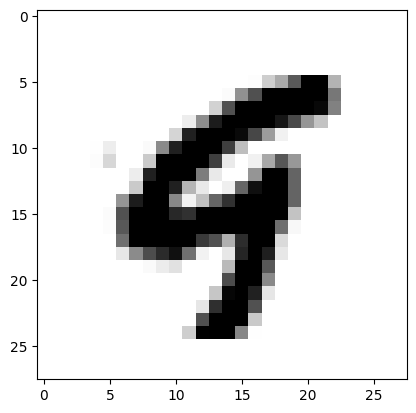

In [58]:
# visualizing image

import matplotlib.pyplot as plt
import random

index = random.randint(0,60000)
plt.imshow(train_images[index], cmap = plt.cm.binary)
plt.show

## Modeling

In [63]:
# preparing image data -> flattening, normalizing

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [32]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [47]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [48]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [49]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2346 - accuracy: 0.9279
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0834 - accuracy: 0.9744
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0543 - accuracy: 0.9833
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9873
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9907


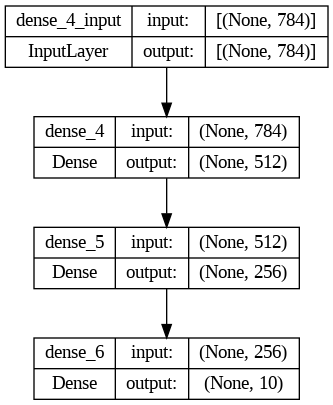

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [51]:
# checking predicted values

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 74ms/step


array([3.1378533e-12, 9.3686603e-10, 4.3073896e-09, 7.6037843e-08,
       4.0686752e-13, 1.5062916e-11, 5.0321529e-16, 9.9999988e-01,
       3.8240643e-12, 4.4900382e-08], dtype=float32)

In [52]:
predictions[0].argmax()

7

In [53]:
predictions[0][7]

0.9999999

In [54]:
test_labels[0]

7

In [55]:
# evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0829 - accuracy: 0.9784
test_acc: 0.9783999919891357


In [64]:
# prompt: make model with 5 layers and evaluate it

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [65]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.3079 - accuracy: 0.9038
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1056 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0725 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0508 - accuracy: 0.9848
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0607 - accuracy: 0.9834
test_acc: 0.9833999872207642
